# Inference
The notebook illustrates running inference on new data using a trained network:
- load data
- run prediction, process segments (sine song) and events (pulses)
- plot and save predictions

__Note:__ For this tutorial to work, you first need to download some data and example models (266MB) from [here](https://www.dropbox.com/sh/wnj3389k8ei8i1c/AACy7apWxW87IS_fBjI8-7WDa?dl=0) and put the four folders in the `tutorials` folder.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import dss.predict
import flammkuchen

In [2]:
# load data - short snippet of dmel song with pulse and sine
x = np.load('dat/dmel_song.npy')  
print(f'data shape is {x.shape} [nb_samples, nb_channels]')

data shape is (20000, 1) [nb_samples, nb_channels]


In [3]:
expected_events, expected_segments = flammkuchen.load('res/expected_results.h5')  # load expected results

In [4]:
# run the data through the network, detect events and segments
events, _, pulse_probabilities = dss.predict.predict(x, 'models/dmel_pulse_tcn_single_channel/', verbose=1, batch_size=1)  # pulse tcn raw
_, segments, sine_probabilities = dss.predict.predict(x, 'models/dmel_sine_tcn_single_channel/', verbose=1, batch_size=1)  # sine tcn raw

print(f'Predicted class probabilities for {len(pulse_probabilities)} samples from {len(x)} input samples.\nThe Missing {len(x) - len(pulse_probabilities)} samples arise from "input length quantization".')     

4/4 [==============================] - 2s 520ms/step
Predicted class probabilities for 16128 samples from 20000 input samples.
The Missing 3872 samples arise from "input length quantization".


TODO describe all keys in events

In [5]:
events

{'pulse': {'index': 1,
  'seconds': array([0.0279, 0.0703, 0.1088, 0.4109, 0.4482, 0.4871, 0.526 , 0.6604,
         0.6942, 0.7298, 0.7682, 0.8017, 0.8359, 0.8703, 0.9086, 0.9429,
         0.9746, 1.0086, 1.0437, 1.0749, 1.1091, 1.1455, 1.1794, 1.2164,
         1.2505, 1.2874]),
  'probabilities': array([0.97761565, 0.99805945, 0.99813604, 0.99137056, 0.99611557,
         0.9986608 , 0.9978902 , 0.9964162 , 0.9978764 , 0.9983308 ,
         0.9969741 , 0.9986505 , 0.9981351 , 0.99843603, 0.99856037,
         0.99832207, 0.9984114 , 0.9983789 , 0.99881315, 0.9984529 ,
         0.99809426, 0.9984308 , 0.998052  , 0.9990428 , 0.99719954,
         0.9952937 ], dtype=float32)},
 'samplerate_Hz': 10000}

Text(0.5, 0, 'samples')

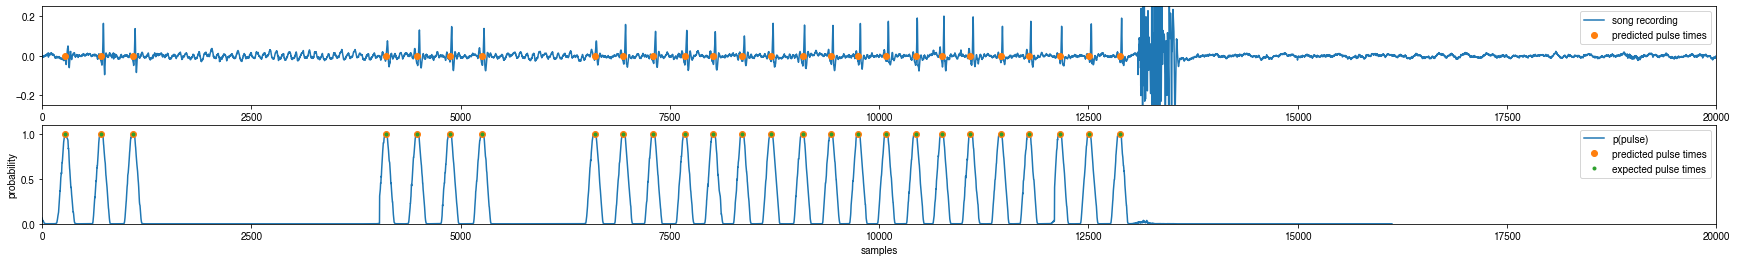

In [6]:
# Plot the predicted and expected event times (pulse song)
plt.gcf().set_size_inches(30, 4)
ax = plt.subplot(211)
plt.plot(x, label='song recording')
plt.plot(events['pulse']['seconds'] * events['samplerate_Hz'], np.zeros((len(events['pulse']['seconds']),)), 'o', label='predicted pulse times')
plt.ylim(-0.25, 0.25)
plt.legend()

plt.subplot(212, sharex=ax)
plt.plot(pulse_probabilities[:,1], label='p(pulse)')
plt.plot(events['pulse']['seconds'] * events['samplerate_Hz'], np.ones((len(events['pulse']['seconds']),)), 'o', label='predicted pulse times')
plt.plot(expected_events['pulse']['seconds'] * events['samplerate_Hz'], np.ones((len(expected_events['pulse']['seconds']),)), '.', label='expected pulse times')
plt.ylim(0, 1.1)
plt.legend()
plt.ylabel('probability')
plt.xlabel('samples')

TODO describe all keys in segments

In [7]:
segments

{'noise': {'index': 0,
  'probabilities': array([0.99441904, 0.99418217, 0.9942526 , ..., 0.9918869 , 0.9923943 ,
         0.9919443 ], dtype=float32),
  'samples': array([1, 1, 1, ..., 1, 1, 1]),
  'onsets_seconds': array([0.    , 0.4048, 0.6508]),
  'offsets_seconds': array([0.1196, 0.5337, 1.6191]),
  'durations_seconds': array([0.1196, 0.1289, 0.9683])},
 'sine': {'index': 1,
  'probabilities': array([0.00558093, 0.00581787, 0.00574732, ..., 0.00811309, 0.0076057 ,
         0.00805571], dtype=float32),
  'samples': array([0, 0, 0, ..., 0, 0, 0]),
  'onsets_seconds': array([0.1197, 0.5338]),
  'offsets_seconds': array([0.4047, 0.6507]),
  'durations_seconds': array([0.285 , 0.1169])},
 'samplerate_Hz': 10000}

Text(0.5, 0, 'samples')

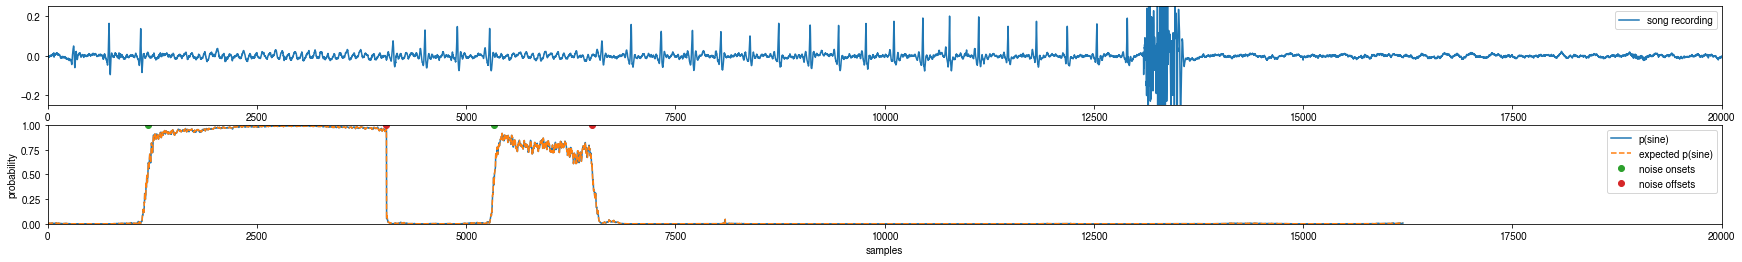

In [8]:
# Plot the predicted and expected segments (sine song)
plt.gcf().set_size_inches(30, 4)
ax = plt.subplot(211)
plt.plot(x, label='song recording')
plt.ylim(-0.25, 0.25)
plt.legend()

plt.subplot(212, sharex=ax)
plt.plot(sine_probabilities[:,1], label='p(sine)')
plt.plot(expected_segments['sine']['probabilities'], '--', label='expected p(sine)')
plt.plot(segments['sine']['onsets_seconds'] * events['samplerate_Hz'], np.ones((len(segments['sine']['onsets_seconds']),)), 'o', label='noise onsets')
plt.plot(segments['sine']['offsets_seconds'] * events['samplerate_Hz'], np.ones((len(segments['sine']['offsets_seconds']),)), 'o', label='noise offsets')
plt.legend()
plt.ylabel('probability')
plt.xlabel('samples')